In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelBinarizer
from sklearn.model_selection import train_test_split
import sklearn.datasets 
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report, log_loss

In [2]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 10000 # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE=0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [3]:
iris = datasets.load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
X,y = iris.data,iris.target
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

## Visualization
<p style="font-family: Arial; font-size:1.2em">
DataFrames are easier to visualize
</p>

In [6]:
# data_df = pd.DataFrame(X, columns = ['A', 'B','C','D'])

# data_df['target'] = y

# data_df.head()

In [7]:
# data_df.info()

In [8]:
# data_df.describe() # Generate descriptive statistic

In [9]:
# # what labels are present?
# data_df.target.unique()

In [10]:
# fig, ax = plt.subplots() # Instantiate
    
# data_df['target'].value_counts().plot(ax=ax, kind='bar');

In [11]:
# # Plot the data
# data_df.plot.scatter('A','B' ,     # columns to plot
#                      s = 40,        # size of the marker
#                      marker = '*',  # type of marker
#                      c = 'target',  # color as per target column
#                      cmap=CMAP);    # using colormap

In [12]:
# # Using Seaborn
# ax = sns.scatterplot(data=data_df, # data from dataframe
#                      x='A', y='B',  # X axis and y axis columns
#                      palette=sns.color_palette("bright", 2), # color map
#                      hue='target'); # Color as per target column

In [13]:
#### In case you want to plot X Array directly
# plt.scatter(X[:,0], X[:,1], s=30, c=y, marker = '*', cmap=CMAP);

In [14]:
y = pd.get_dummies(y).to_numpy()
y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [15]:
y.shape

(150, 3)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=TEST_SIZE,
                                                 shuffle=True,
                                                 random_state=RANDOM_STATE,
                                                 stratify=y
                                                 )

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [20]:
y_test.shape

(30, 3)

In [21]:
# weights = rng.random(data_train.shape[1])
# # w0,w1,w2
# # Z = x*w+b
# # Z= weights[0]
# weights

In [22]:
# Softmax function
def fn_softmax(z):
    exp_z = np.exp(z)
    return exp_z/np.sum(exp_z,axis=1,keepdims=True)

In [23]:
sm = fn_softmax(np.asarray([[8,5,0],[-10,0,10]]))
#sm.shape
sm.sum(axis=1).shape

(2,)

In [24]:
def fn_activ(z):
    return np.tanh(z)
def fn_activ_prime(a):
    return 1-np.tanh(a)**2

In [25]:
def predict(model,X_p):
    W1,b1,W2,b2 = model['W1'],model['b1'],model['W2'],model['b2']
    
    # Layer1 
    z1 = X_p.dot(W1)+b1  # Aggregation
    a1 = fn_activ(z1)  # Activation

    #Layer 2
    z2=a1.dot(W2)+b2  # Aggregation
    a2=fn_softmax(z2)    # Activation
    return np.argmax(a2,axis=1) #Pick index of class with highest probability
    

In [26]:
def calculate_loss(model,X_l,y_l):
    W1,b1,W2,b2 = model['W1'],model['b1'],model['W2'],model['b2']
    m=X_l.shape[0]
    ### Forward Propogation
    # Layer1 
    z1 = X_l.dot(W1)+b1  # Aggregation
    a1 = fn_activ(z1)  # Activation

    #Layer 2
    z2=a1.dot(W2)+b2  # Aggregation
    a2=fn_softmax(z2)    # Activation

    data_loss = -((y_l)*np.log(a2)+
                  (1-y_l)*np.log(1-a2)).sum() # Binary

    return data_loss / m

In [27]:
# wgts  = np.array([0.1,2.0,1.0])
# predict(data_train[0],wgts)

In [28]:
loss_hist = {}

In [29]:
def build_model(X_tr,y_tr,nn_hdim,nn_out,alpha=ALPHA,epochs=EPOCHS):
    m,nn_input_dim = X_tr.shape
    nn_output_dim = nn_out
    W1 = np.random.randn(nn_input_dim,nn_hdim)/np.sqrt(nn_input_dim)
    W2 = np.random.randn(nn_hdim,nn_output_dim)/np.sqrt(nn_hdim)
    b1 = np.zeros((1,nn_hdim),dtype=np.float32)
    b2 = np.zeros((1,nn_output_dim),dtype=np.float32)
    curr_loss=0
    loss,epoch=[],[]
    for i in range(0,epochs):
        ### Forward Propogation
        # Layer1 
        z1 = X_tr.dot(W1)+b1  # Aggregation   z = X.W +b
        a1 = fn_activ(z1)     # Activation  a=g(z)

        #Layer 2
        z2=a1.dot(W2)+b2    # Aggregation  z = X.W +b
        a2=fn_softmax(z2)   # Activation  a=g(z)
 
        ## Back propogation
        assert(a2.shape == y_tr.shape), f'check y {a2.shape}/{y.shape}'
        dz2 = a2 - y_tr # REMEMMBER dim of a2 and y to be same

        dW2 = (a1.T).dot(dz2)

        assert(W2.shape == dW2.shape), f'check W2 {W2.shape}/{dW2.shape}'

        db2 = np.sum(dz2,axis=0,keepdims=True)
        assert(b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'

        da1 = dz2.dot(W2.T)
        assert(a1.shape == da1.shape), f'check b2 {a1.shape}/{da1.shape}'

        #Layer 1 
        dz1 = da1 * fn_activ_prime(z1)
        assert(z1.shape == dz1.shape), f'check b2 {z1.shape}/{dz1.shape}'

        dW1  = (X_tr.T).dot(dz1)
        assert(W1.shape == dW1.shape), f'check W2 {W1.shape}/{dW1.shape}'

        db1 = np.sum(dz1,axis=0,keepdims=True)
        assert(b1.shape == db1.shape), f'check b2 {b1.shape}/{db1.shape}'

        ### Gradient Update
        W1 += -alpha*dW1/m
        b1 += -alpha*db1/m
        W2 += -alpha*dW2/m
        b2 += -alpha*db2/m

        model = {'W1':W1,'b1':b1,
                 'W2': W2, 'b2': b2}
        
        curr_loss = calculate_loss(model,X_tr,y_tr)
        loss.append(curr_loss)
        epoch.append(i)

        if i%1000 == 0:
            print(f'After epoch : {i:3d}; loss : {curr_loss:.5f}')

    loss_hist['epoch']=epoch
    loss_hist['loss']=loss

    return model

In [30]:
nn_output_dim=3
model = build_model(X_train,y_train,4,nn_output_dim)

After epoch :   0; loss : 2.08173
After epoch : 1000; loss : 0.11693
After epoch : 2000; loss : 0.09999
After epoch : 3000; loss : 0.09512
After epoch : 4000; loss : 0.09266
After epoch : 5000; loss : 0.09097
After epoch : 6000; loss : 0.08960
After epoch : 7000; loss : 0.08840
After epoch : 8000; loss : 0.08730
After epoch : 9000; loss : 0.08621


In [31]:
model

{'W1': array([[ 0.71657546, -0.38011087, -0.67390239,  0.06539461],
        [-0.60322539,  0.73979725,  0.92807543, -0.59093352],
        [-2.31395259, -0.40216917, -0.96326486,  1.37721199],
        [-1.20379321, -0.40034731, -1.4386191 ,  2.16584767]]),
 'b1': array([[ 0.5493676 , -0.03537638, -1.2709664 , -2.7712379 ]],
       dtype=float32),
 'W2': array([[ 1.72966427,  1.41205889, -1.80336131],
        [ 1.05509173, -0.2183326 , -0.96628721],
        [ 4.08386258, -2.52001932, -0.83824566],
        [-0.85355296, -2.14027353,  4.41050552]]),
 'b2': array([[ 0.1789765 , -0.20708698,  0.0281108 ]], dtype=float32)}

In [32]:
loss_hist

{'epoch': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  

<Axes: xlabel='epoch'>

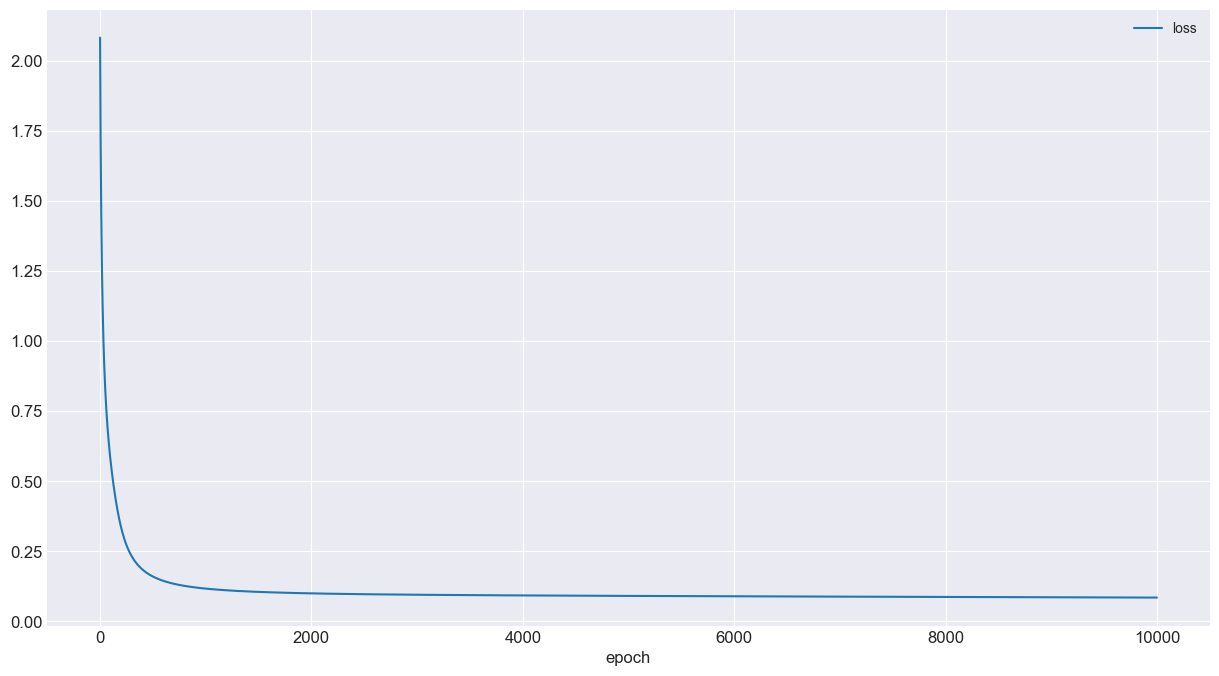

In [33]:
pd.DataFrame(loss_hist).plot(x='epoch')

In [34]:
y_pred = predict(model,X_train)
accuracy_score(y_train.argmax(axis=1),y_pred)

0.9833333333333333

In [35]:
# X = X_train
# fig,ax = plt.subplots()

# dm = 0.005
# x_min,x_max = X[:,0].min()-0.05,X[:,0].max()+0.05
# y_min,y_max = X[:,1].min()-0.05,X[:,1].max()+0.05

# xx,yy = np.meshgrid(np.arange(x_min,x_max,dm),
#                     np.arange(y_min,y_max,dm))

# XX = np.c_[xx.ravel(),yy.ravel()]
# y_pred = predict(model,XX)


# y_pred = predict(model,XX)
# Z = np.array(y_pred).reshape(xx.shape)
# ax.contourf(xx,yy,Z,cmap = CMAP,alpha=0.8)
# ax.scatter(X[:,0],X[:,1],c=y_train.argmax(axis=1),edgecolors='k',cmap=plt.cm.bwr)

# Test Data

In [36]:
y_pred = predict(model,X_test)
accuracy_score(y_test.argmax(axis=1),y_pred)

0.9666666666666667

In [37]:
cm = confusion_matrix(y_test.argmax(axis=1),y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

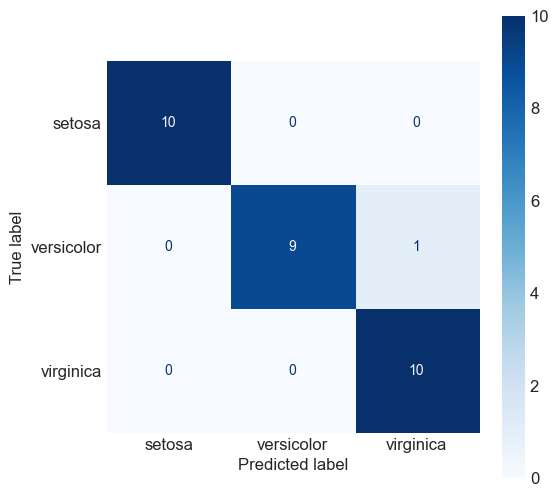

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=iris.target_names)
fig,ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax,cmap=plt.cm.Blues)
ax.grid(False)